In [1]:
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    total = len(y_true)
    acc = correct/total
    return acc

## Accuracy
    

In [2]:
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]
print(accuracy(y_true, y_pred))

0.625


In [3]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.625

## TP/TN/FP/FN

In [4]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
            

In [5]:
print(true_positive(y_true, y_pred))

2


In [6]:
def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

In [7]:
print(true_negative(y_true, y_pred))

3


In [8]:
def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

In [9]:
print(false_positive(y_true, y_pred))

1


In [10]:
def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [11]:
print(false_negative(y_true, y_pred))

2


In [12]:
def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    acc = (tp+tn)/(tp+tn+fn+fp)
    return acc

In [13]:
print(accuracy_v2(y_true, y_pred))

0.625


## Precision & Recall

In [14]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    prec = tp/(tp+fp)
    return prec

In [15]:
precision(y_true, y_pred)

0.6666666666666666

In [16]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/(tp+fn)
    return recall

In [17]:
recall(y_true, y_pred)

0.5

## Precision-Recall Curve

In [18]:
y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [19]:
precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]

In [20]:
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

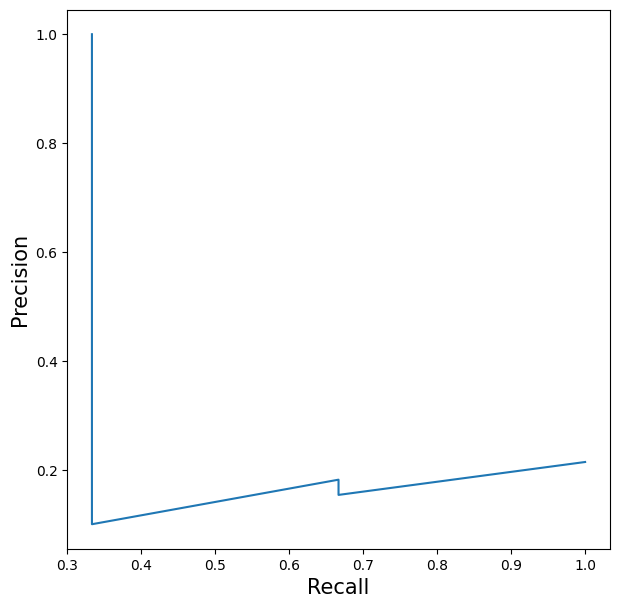

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

# F1-Score

In [22]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2*p*r/(p+r)
    return score

In [23]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [24]:
f1(y_true, y_pred)

0.5714285714285715

In [25]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285714

## TPR/Recall/Sensitivity

In [37]:
def tpr(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tpr = tp/(tp+fn)
    return tpr

## FPR

In [41]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fpr = fp/(fp+tn)
    return fpr

## ROC & AUC

In [28]:
tpr_list = []
fpr_list = []

In [31]:
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

In [32]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

In [44]:
for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]

    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

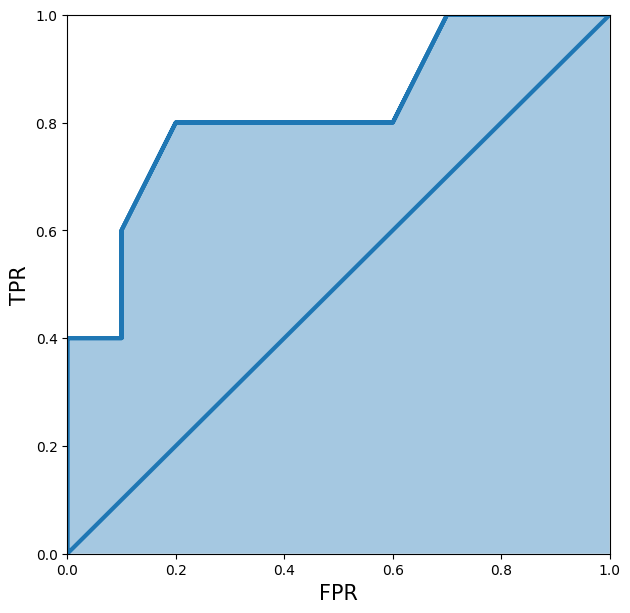

In [50]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [51]:
# ROC_AUC_SCORE
metrics.roc_auc_score(y_true, y_pred)

np.float64(0.8300000000000001)

# log loss

In [52]:
import numpy as np

In [55]:
def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        yp = np.clip(yp, epsilon, 1 - epsilon)
        
        temp_loss = -1*(yt*np.log(yp) + 
                        (1-yt)*np.log(1-yp))
        loss.append(temp_loss)

    return np.mean(loss)        

In [56]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

np.float64(0.49882711861432294)

In [57]:
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294